## Sigma_los against R_h plane
Generating Fig. 2 of paper

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from orbit import *
import json
import os

vmax_sawala,sig_vmax_sawala = 17.6, 3.2
c=20.
Delta=101.1

def slos_r(r,vmax,c=c,Delta=Delta):
    rsdm = nbody_tools.rs_Vmax(vmax,c,Delta=Delta)
    return vmax*np.sqrt(1.85)*np.sqrt(rsdm/r*(np.log(1.+r/rsdm)-r/(rsdm+r)))

def slos_Rh(Rh,vmax,c=c,Delta=Delta):
    return slos_r(4.*Rh/3.,vmax,c=c,Delta=Delta)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/jls/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
def plot_slos_Minit(slos_fld='sig_proj',scut=20.):
    slist=[0.5,1.,2.]
    for s in slist:
        for i,pmmag in enumerate([0.05,0.1,0.17,0.25]):
            round_fl = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_10_properties.csv'%(int(s),int(pmmag*100.))
            if s==0.5:
                round_fl = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%02d_PM_%i_ca_10_properties.csv'%(int(s*10.),int(pmmag*100.))
            if not os.path.isfile(round_fl):
                continue
            data = pd.read_csv(round_fl)
            if slos_fld not in data.columns:
                continue
            data['m_half'] = (data['mass_dm_core_init']+data['mass_st_core_init'])/(data['mass_dm_core_init']+data['mass_st_core_init'])[0]
            fltr = (data.m_half>0.01)&(data.s>20.)
            plt.plot(data['m_half'][fltr],
                     data[slos_fld][fltr]/data[slos_fld][fltr][0],
                     '.',
                     color=sns.color_palette()[i],label='%0.2f'%pmmag,
                    alpha=0.6)    
            flat_fl = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_03_properties.csv'%(int(s),int(pmmag*100.))
            if s==0.5:
                flat_fl = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%02d_PM_%i_ca_03_properties.csv'%(int(s*10.),int(pmmag*100.))
            data_flat = pd.read_csv(flat_fl)
            data_flat['m_half'] = (data_flat['mass_dm_core_init']+data_flat['mass_st_core_init'])/(data_flat['mass_dm_core_init']+data_flat['mass_st_core_init'])[0]
            fltr_flt = (data_flat.m_half>0.01)&(data_flat.s>scut)
            plt.plot(data_flat['m_half'][fltr_flt],
                     data_flat[slos_fld][fltr_flt]/data_flat[slos_fld][fltr_flt][0],
                     '^',ms=7,
                     color=sns.color_palette()[i],label='%0.2f'%pmmag,
                    alpha=0.6)
    plt.xlim(0.01,1.3)
    plt.ylim(0.,1.2)
    xx = np.logspace(-2.,0.)
    plt.plot(xx,penarrubia_tracks_Mh(xx)[0],color='k')
    plt.ylabel('$\sigma_\mathrm{los}/\sigma_\mathrm{los,0}$')
    plt.xlabel('$M_\mathrm{h}/M_\mathrm{h,0}$')
    plt.semilogx()

def plot_rh_Minit(slos_fld='r_half',scut=20.):
    slist=[0.5, 1.,2.]
    for s in slist:
        for i,pmmag in enumerate([0.05,0.1,0.17,0.25]):
            round_fl = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_10_properties.csv'%(int(s),int(pmmag*100.))
            if s==0.5:
                round_fl = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%02d_PM_%i_ca_10_properties.csv'%(int(s*10.),int(pmmag*100.))
            if not os.path.isfile(round_fl):
                continue
            data = pd.read_csv(round_fl)
            data['m_half'] = (data['mass_dm_core_init']+data['mass_st_core_init'])/(data['mass_dm_core_init']+data['mass_st_core_init'])[0]
            fltr = (data.m_half>0.01)&(data.s>scut)
            plt.plot(data['m_half'][fltr],
                     data[slos_fld][fltr]/data[slos_fld][fltr][0],
                     '.',
                     color=sns.color_palette()[i],label='%0.2f'%pmmag,
                    alpha=0.6)            
            flat_fl = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_03_properties.csv'%(int(s),int(pmmag*100.))
            if s==0.5:
                flat_fl = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%02d_PM_%i_ca_03_properties.csv'%(int(s*10.),int(pmmag*100.))
            data_flat = pd.read_csv(flat_fl)
            data_flat['m_half'] = (data_flat['mass_dm_core_init']+data_flat['mass_st_core_init'])/(data_flat['mass_dm_core_init']+data_flat['mass_st_core_init'])[0]
            fltr_flt = (data_flat.m_half>0.01)&(data_flat.s>scut)
            plt.plot(data_flat['m_half'][fltr_flt],
                     data_flat[slos_fld][fltr_flt]/data_flat[slos_fld][fltr_flt][0],
                     '^',ms=7,
                     color=sns.color_palette()[i],label='%0.2f'%pmmag,
                    alpha=0.6)
    plt.xlim(0.007,1.2)
    plt.ylim(0.,1.4)
    xx = np.logspace(-2.,0.)
    plt.plot(xx,penarrubia_tracks_Mh(xx)[1],color='k')
    l,=plt.plot(xx,penarrubia_tracks_Mh_adjusted(xx)[1],color='k',ls='dashed')
    l.set_dashes((4,1))
    plt.ylabel('$R_\mathrm{h}/R_\mathrm{h,0}$')
    plt.xlabel('$M_\mathrm{h}/M_\mathrm{h,0}$')
    plt.semilogx()

In [16]:
def plot_slos_rh(slos_fld='sig_proj'):
    slist=[0.5,1.,2.]
    for s in slist:
        for i,pmmag in enumerate([0.05,0.1,0.17,0.25]):
            round_fl = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_10_properties.csv'%(int(s),int(pmmag*100.))
            if s==0.5:
                round_fl = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%02d_PM_%i_ca_10_properties.csv'%(int(s*10.),int(pmmag*100.))
            if not os.path.isfile(round_fl):
                print s, pmmag
                continue
            data = pd.read_csv(round_fl)
            if slos_fld not in data.columns:
                continue
            data['m_half'] = (data['mass_dm_core_init']+data['mass_st_core_init'])/(data['mass_dm_core_init']+data['mass_st_core_init'])[0]
            flat_fl = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_03_properties.csv'%(int(s),int(pmmag*100.))
            if s==0.5:
                flat_fl = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%02d_PM_%i_ca_03_properties.csv'%(int(s*10.),int(pmmag*100.))
            data_flat = pd.read_csv(flat_fl)
            data_flat['m_half'] = (data_flat['mass_dm_core_init']+data_flat['mass_st_core_init'])/(data_flat['mass_dm_core_init']+data_flat['mass_st_core_init'])[0]
            lbl =r'$%0.2f$'%pmmag
            if s>.5:
                lbl=None
            fltr = (data.m_half>0.01)&(data.s>20.)
            fltr_flt = (data_flat.m_half>0.01)&(data_flat.s>20.)
            
            plt.plot(data['r_half'][fltr].values,data[slos_fld][fltr].values,'.',
                     color=sns.color_palette()[i],label=lbl,
                    alpha=0.8)
            plt.plot(data['r_half'][fltr][:1].values,data[slos_fld][fltr][:1].values,'.',
                     color=sns.color_palette()[i],label=None,markeredgecolor='k',markeredgewidth=1,zorder=10)
            plt.plot(data_flat['r_half'][fltr_flt].values,data_flat[slos_fld][fltr_flt].values,'^',ms=7
                    ,color=sns.color_palette()[i],label=None,
                    alpha=0.8)
            plt.plot(data_flat['r_half'][fltr_flt][:1].values,data_flat[slos_fld][fltr_flt].values[:1],'^',ms=7
                    ,color=sns.color_palette()[i],label=None,markeredgecolor='k',markeredgewidth=1,zorder=15)
    plt.xlim(0.1,4.)
    plt.ylim(1.,22.)
    xx = np.logspace(-2.,0.)
    plt.plot(penarrubia_tracks_Mh(xx)[1]*1.45/s,penarrubia_tracks_Mh(xx)[0]*slos_Rh(1.45/s,vmax_sawala),color='k')
    plt.plot(penarrubia_tracks_Mh(xx)[1]*1.45,penarrubia_tracks_Mh(xx)[0]*slos_Rh(1.45,vmax_sawala),color='k')
    
    l,=plt.plot(penarrubia_tracks_Mh_adjusted(xx)[1]*1.45/s,
             penarrubia_tracks_Mh_adjusted(xx)[0]*slos_Rh(1.45/s,vmax_sawala),color='k',ls='dashed')
    l.set_dashes((4,1))
    l,=plt.plot(penarrubia_tracks_Mh_adjusted(xx)[1]*1.45,
             penarrubia_tracks_Mh_adjusted(xx)[0]*slos_Rh(1.45,vmax_sawala),color='k',ls='dashed')
    l.set_dashes((4,1))
    xx = np.logspace(-2.,1.)
    plt.plot(xx,slos_Rh(xx,vmax_sawala),color='gray')
    plt.fill_between(xx,slos_Rh(xx,vmax_sawala-sig_vmax_sawala),
                     slos_Rh(xx,vmax_sawala+sig_vmax_sawala),color='gray',alpha=0.4)
    plt.semilogy()
    plt.semilogx()
    crater2_slos, crater2_slos_err = 2.7, 0.3
    crater2_rh, crater2_rh_err = 1.066, 0.084
    plt.errorbar([crater2_rh],[crater2_slos],xerr=[crater2_rh_err],yerr=[crater2_slos_err],fmt='o',color='k',ms=7)
    plt.legend(ncol=4,loc='lower center',bbox_to_anchor=(0.5,1.))
    plt.ylabel('$\sigma_\mathrm{los}/\,\mathrm{km\,s}^{-1}$')
    plt.xlabel('$R_\mathrm{h}/\mathrm{kpc}$')

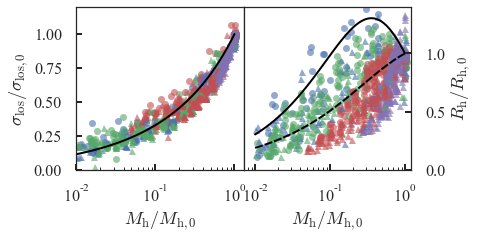

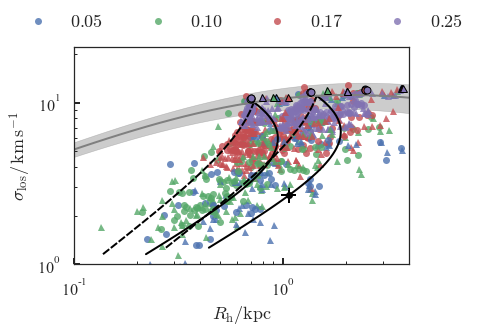

In [17]:
f,a=plt.subplots(1,2,figsize=[6.,3.])
plt.sca(a[0])
plot_slos_Minit(slos_fld='sig_proj_flat')
plt.sca(a[1])
plot_rh_Minit()
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.subplots_adjust(wspace=0.)
# plt.tight_layout()
plt.savefig('mfrac_slos_rh_sims.pdf',bbox_inches='tight')
plt.figure()
plot_slos_rh(slos_fld='sig_proj_flat')
plt.savefig('slos_rh_sims.pdf',bbox_inches='tight')

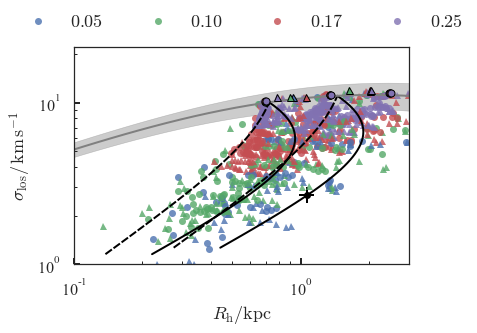

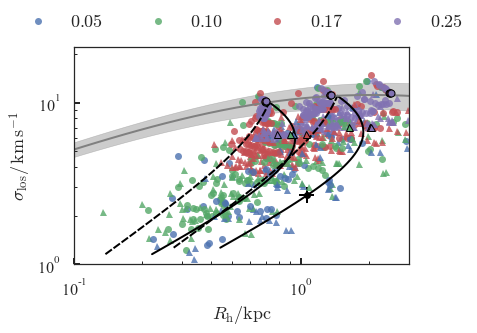

In [11]:
plot_slos_rh(slos_fld='sig_maj')
plt.figure()
plot_slos_rh(slos_fld='sig_min')
# plt.savefig('sigmin_rh_sims.pdf',bbox_inches='tight')

[]

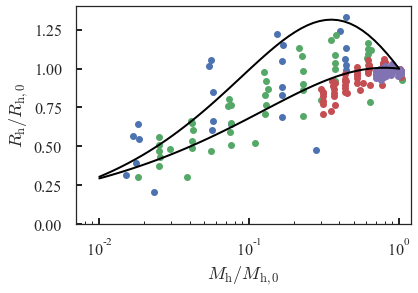

In [12]:
slos_fld = 'r_half'
slist=[2.]
for s in slist:
    for i,pmmag in enumerate([0.05,0.1,0.17,0.25]):
        round_fl = '/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_10_properties.csv'%(int(s),int(pmmag*100.))
        if not os.path.isfile(round_fl):
            continue
        data = pd.read_csv(round_fl)
        data['m_half'] = data['mass_dm_core_init']/data['mass_dm_core_init'][0]
        plt.plot(data['m_half'][data.m_half>0.01],data[slos_fld][data.m_half>0.01]/data[slos_fld][data.m_half>0.01][0],
                 '.',
                 color=sns.color_palette()[i],label='%0.2f'%pmmag)            
plt.xlim(0.007,1.2)
plt.ylim(0.,1.4)
xx = np.logspace(-2.,0.)
alpha=0.9
beta=.4
plt.plot(xx,2.**alpha*xx**beta/(1.+xx)**alpha,color='k')

alpha=2.3
beta=.6
plt.plot(xx,2.**alpha*xx**beta/(1.+xx)**alpha,color='k')
plt.ylabel('$R_\mathrm{h}/R_\mathrm{h,0}$')
plt.xlabel('$M_\mathrm{h}/M_\mathrm{h,0}$')
plt.semilogx()

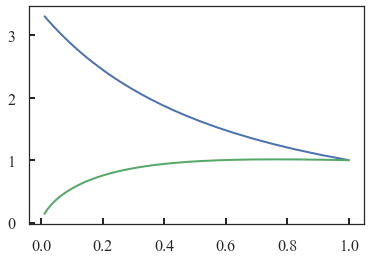

In [13]:
plt.plot(xx,penarrubia_tracks(xx)[3])
plt.plot(xx,penarrubia_tracks(xx)[2])

In [14]:
def plot_quantity(fld,ylim,ylabel):
    s=2.
    for i,pmmag in enumerate([0.05,0.1,0.17,0.25]):
        data = pd.read_csv('/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_10_properties.csv'%(int(s),int(pmmag*100.)))
        data['m_half'] = data['mass_dm_core_init']/data['mass_dm_core_init'][0]
        data_flat = pd.read_csv('/data/gaia-eso/jls/m2m/CraterII/vmax_universal/2comp_cuspplum_nfw_SP_%i_PM_%i_ca_03_properties.csv'%(int(s),int(pmmag*100.)))
        data_flat['m_half'] = data_flat['mass_dm_core_init']/data_flat['mass_dm_core_init'][0]
        plt.plot(data['times'][data.m_half>0.01],data[fld][data.m_half>0.01],
                 color=sns.color_palette()[i],label='%0.2f'%pmmag)
        plt.plot(data_flat['times'][data_flat.m_half>0.01],data_flat[fld][data_flat.m_half>0.01],
             color=sns.color_palette()[i],label='%0.2f'%pmmag,ls='dashed',alpha=0.6)
        plt.ylim(0.,ylim)
    plt.xlabel(r'Time /$\,\mathrm{Gyr}$')
    plt.ylabel(ylabel)
    plt.xlim(0.,10.)

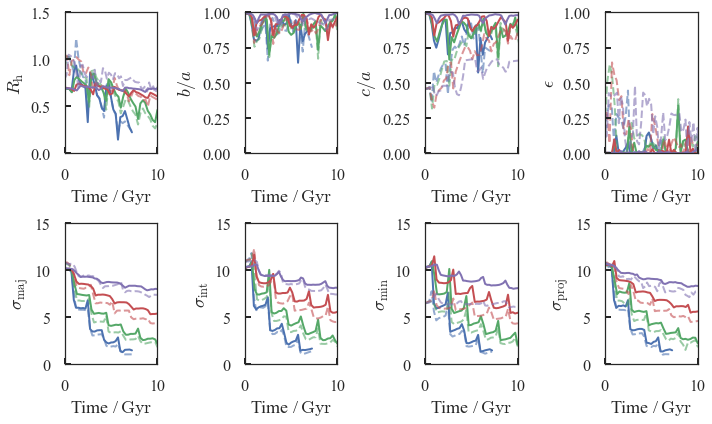

In [15]:
f,a=plt.subplots(2,4,figsize=[10.,6.])
plt.sca(a[0][0])
plot_quantity('r_half',1.5,r'$R_\mathrm{h}$')
plt.sca(a[0][1])
plot_quantity('ba_st',1.,r'$b/a$')
plt.sca(a[0][2])
plot_quantity('ca_st',1.,r'$c/a$')
plt.sca(a[0][3])
plot_quantity('eps',1.,r'$\epsilon$')
plt.sca(a[1][0])
plot_quantity('sig_maj',15.,r'$\sigma_\mathrm{maj}$')
plt.sca(a[1][1])
plot_quantity('sig_int',15.,r'$\sigma_\mathrm{int}$')
plt.sca(a[1][2])
plot_quantity('sig_min',15.,r'$\sigma_\mathrm{min}$')
plt.sca(a[1][3])
plot_quantity('sig_proj_flat',15.,r'$\sigma_\mathrm{proj}$')
plt.tight_layout()